## Import the necessary Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
import joblib

### Loading the Train & Valid Dataset

In [2]:
training_data = pd.read_csv('./Datasets/train.csv')
validation_data = pd.read_csv('./Datasets/valid.csv')

### Loading Test Dataset

In [3]:
test_data = pd.read_csv('./Datasets/test.csv')

Take a Quick Look at the Data Structure

In [4]:
training_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6


In [5]:
training_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.000905,0.046109,-0.007867,0.006516,-0.084563,-0.041206,0.115190,-0.062550,-0.015853,-0.018170,...,-0.041763,0.008129,-0.005715,0.048044,0.037690,-0.038338,30.498843,27.975107,0.799299,5.997125
std,0.074272,0.051005,0.059429,0.083817,0.079565,0.055698,0.100403,0.069030,0.061706,0.062766,...,0.078832,0.064496,0.059127,0.068831,0.056442,0.089426,17.328389,5.735913,0.400532,2.375567
min,-0.263766,-0.167903,-0.241743,-0.310653,-0.521423,-0.303506,-0.266982,-0.351085,-0.286419,-0.275221,...,-0.351263,-0.243115,-0.267768,-0.244857,-0.179989,-0.348414,1.000000,22.000000,0.000000,0.000000
25%,-0.050877,0.009260,-0.049900,-0.046124,-0.135082,-0.075579,0.040635,-0.107370,-0.057616,-0.056116,...,-0.094268,-0.033156,-0.044131,0.002746,-0.001078,-0.096872,15.000000,25.000000,1.000000,6.000000
50%,-0.005263,0.046863,-0.009273,0.010040,-0.081096,-0.039769,0.113300,-0.058721,-0.020981,-0.018736,...,-0.041934,0.009489,-0.002159,0.040703,0.035666,-0.034802,30.000000,27.000000,1.000000,6.000000
75%,0.049738,0.082203,0.032208,0.063190,-0.033008,-0.004525,0.184644,-0.016211,0.023647,0.022856,...,0.010713,0.051168,0.035046,0.086970,0.074293,0.019831,46.000000,30.000000,1.000000,6.000000
max,0.305164,0.257933,0.240829,0.286214,0.214045,0.216048,0.466118,0.195778,0.258841,0.207526,...,0.303684,0.250487,0.276657,0.396895,0.297229,0.283199,60.000000,61.000000,1.000000,13.000000


## Data Pre-processing

### Check whether unsupported data contain in the dataset (Strings, ...)

#### 1. In Training Dataset

In [6]:
print(training_data.dtypes.unique())

[dtype('float64') dtype('int64')]


#### 2. In validation Dataset

In [7]:
print(validation_data.dtypes.unique())

[dtype('float64') dtype('int64')]


#### 3. In Test Dataset

In [8]:
print(test_data.dtypes.unique())

[dtype('int64') dtype('float64')]


### Check for Missing Values

In [9]:
def plot_missing_values(data : pd.DataFrame):
    missing_percentage = (data.isnull().sum() / len(data)) * 100
    missing_percentage = missing_percentage[missing_percentage > 0]  # Only columns with missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Columns with Missing Values')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Percentage of Missing Values in Columns')
    plt.tight_layout()
    plt.show()

#### 1. In Training Dataset

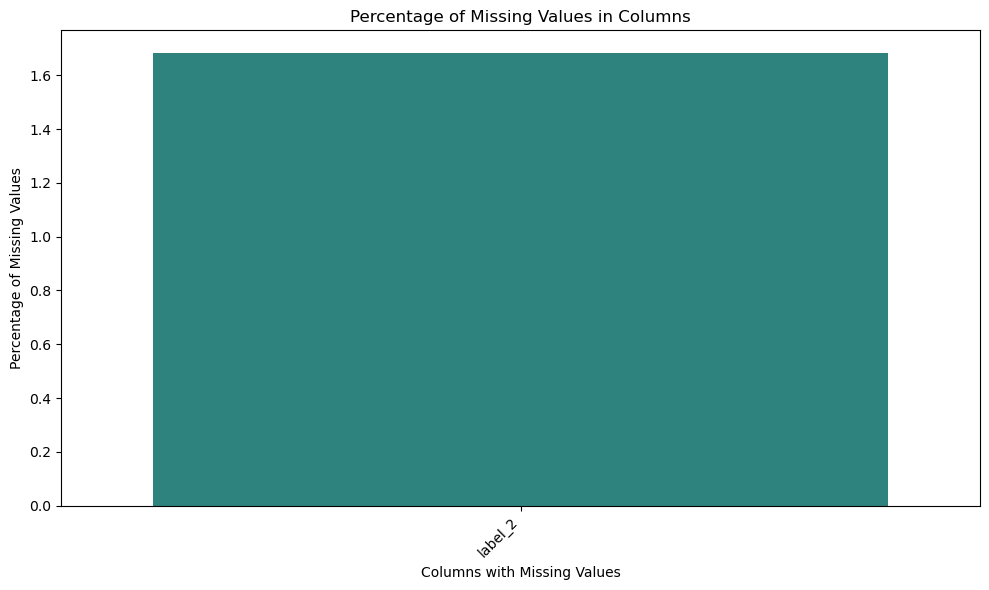

In [10]:
plot_missing_values(training_data)

#### 2. In validation Dataset

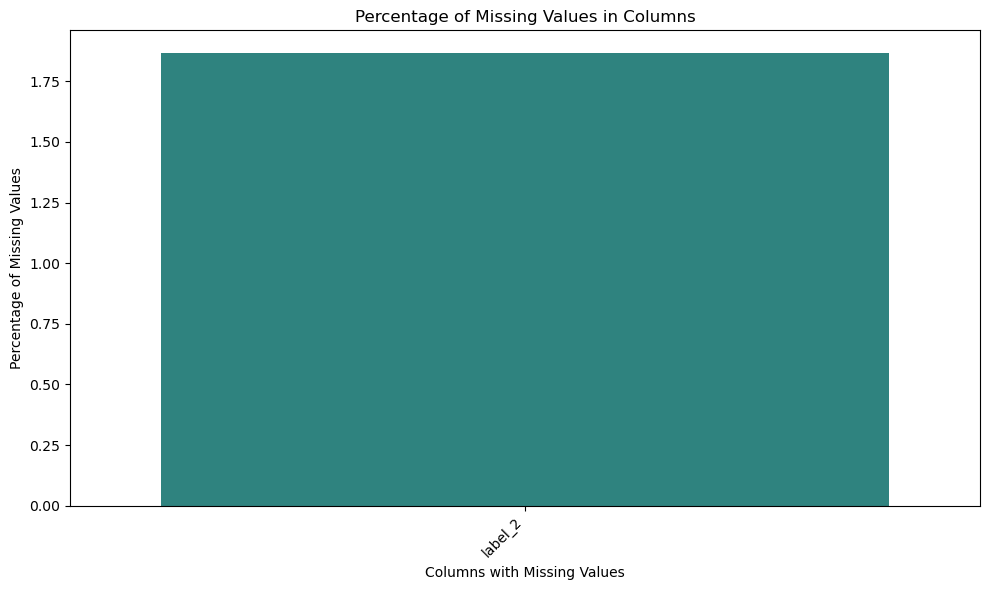

In [11]:
plot_missing_values(validation_data)

- Since Missing Values precentage is very low and values are missing in label_2(catogorical) each dataset so rows with empty data will be removed only for label 2 datasets

### Removing Missing Values

In [12]:
training_data_label_2 = training_data.dropna()
validation_data_label_2 = validation_data.dropna()

### Separate Features and Target Labels from Datasets

#### 1. In Training Dataset

In [13]:
# Separate features and target labels
training_features = training_data.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
training_features_label_2 = training_data_label_2.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
training_target_label_1 = training_data['label_1']
training_target_label_2 = training_data_label_2['label_2']
training_target_label_3 = training_data['label_3']
training_target_label_4 = training_data['label_4']

#### 2.In validation Dataset

In [14]:
validation_features = validation_data.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
validation_features_label_2 = validation_data_label_2.drop(['label_1', 'label_2','label_3','label_4'], axis=1)
validation_target_label_1 = validation_data['label_1']
validation_target_label_2 = validation_data_label_2['label_2']
validation_target_label_3 = validation_data['label_3']
validation_target_label_4 = validation_data['label_4']

#### 3.In Testing Dataset

In [15]:
test_IDs = test_data['ID']
test_features = test_data.drop(['ID'], axis=1)

### Visualizing Target Variables (Training)

In [16]:
def create_barchart(data :pd.DataFrame, title : str, x_label:str, y_label:str,palette_name:str="deep"):
    # Count the frequency of each unique value in the data frame
    value_counts = data.value_counts()

    # Create a bar plot using Seaborn
    plt.figure(figsize=(30, 10))
    sns.barplot(x=value_counts.index, y=value_counts.values,palette=palette_name)

    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()

#### 1.Label_1

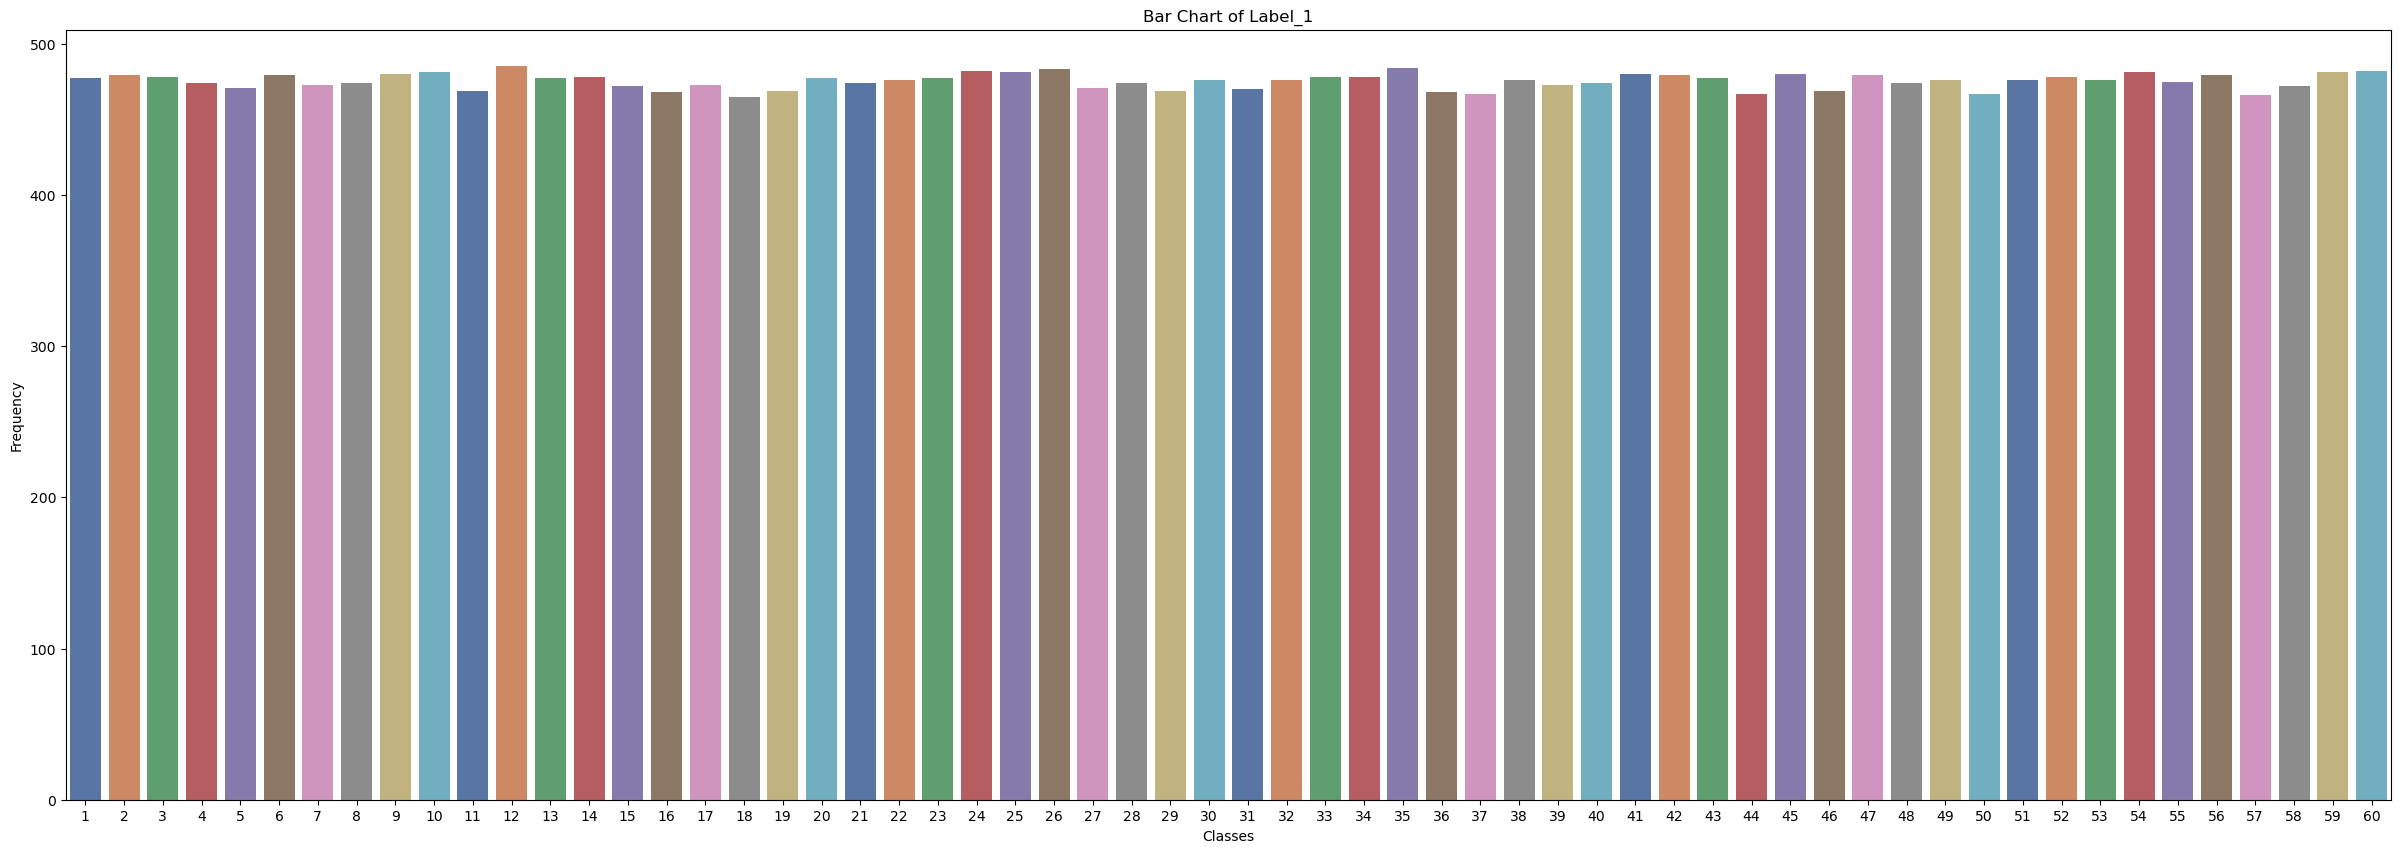

In [17]:
create_barchart(training_target_label_1,'Bar Chart of Label_1','Classes','Frequency')

- Class Distribution is closely blanced

#### 2.Label_2

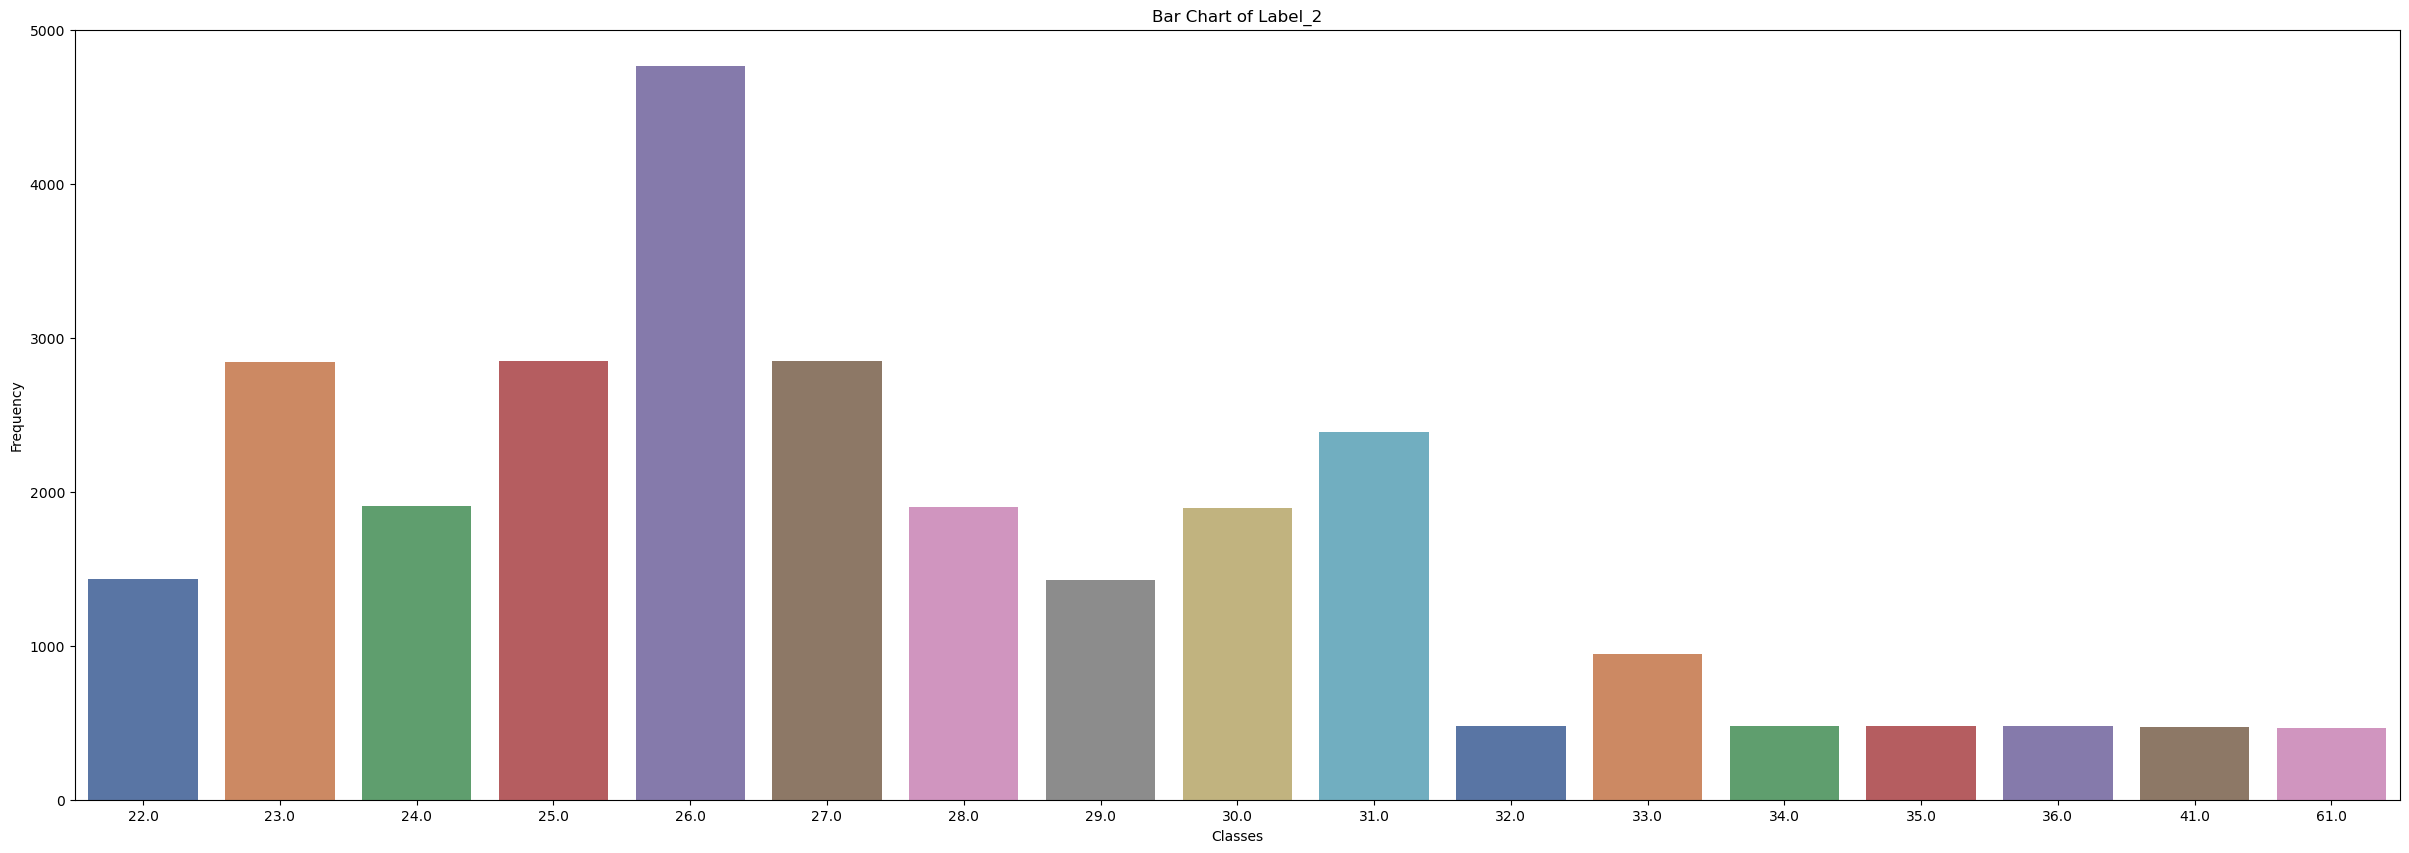

In [18]:
create_barchart(training_target_label_2,'Bar Chart of Label_2','Classes','Frequency')

- Class Distribution is Unbalanced

#### 3.Label_3

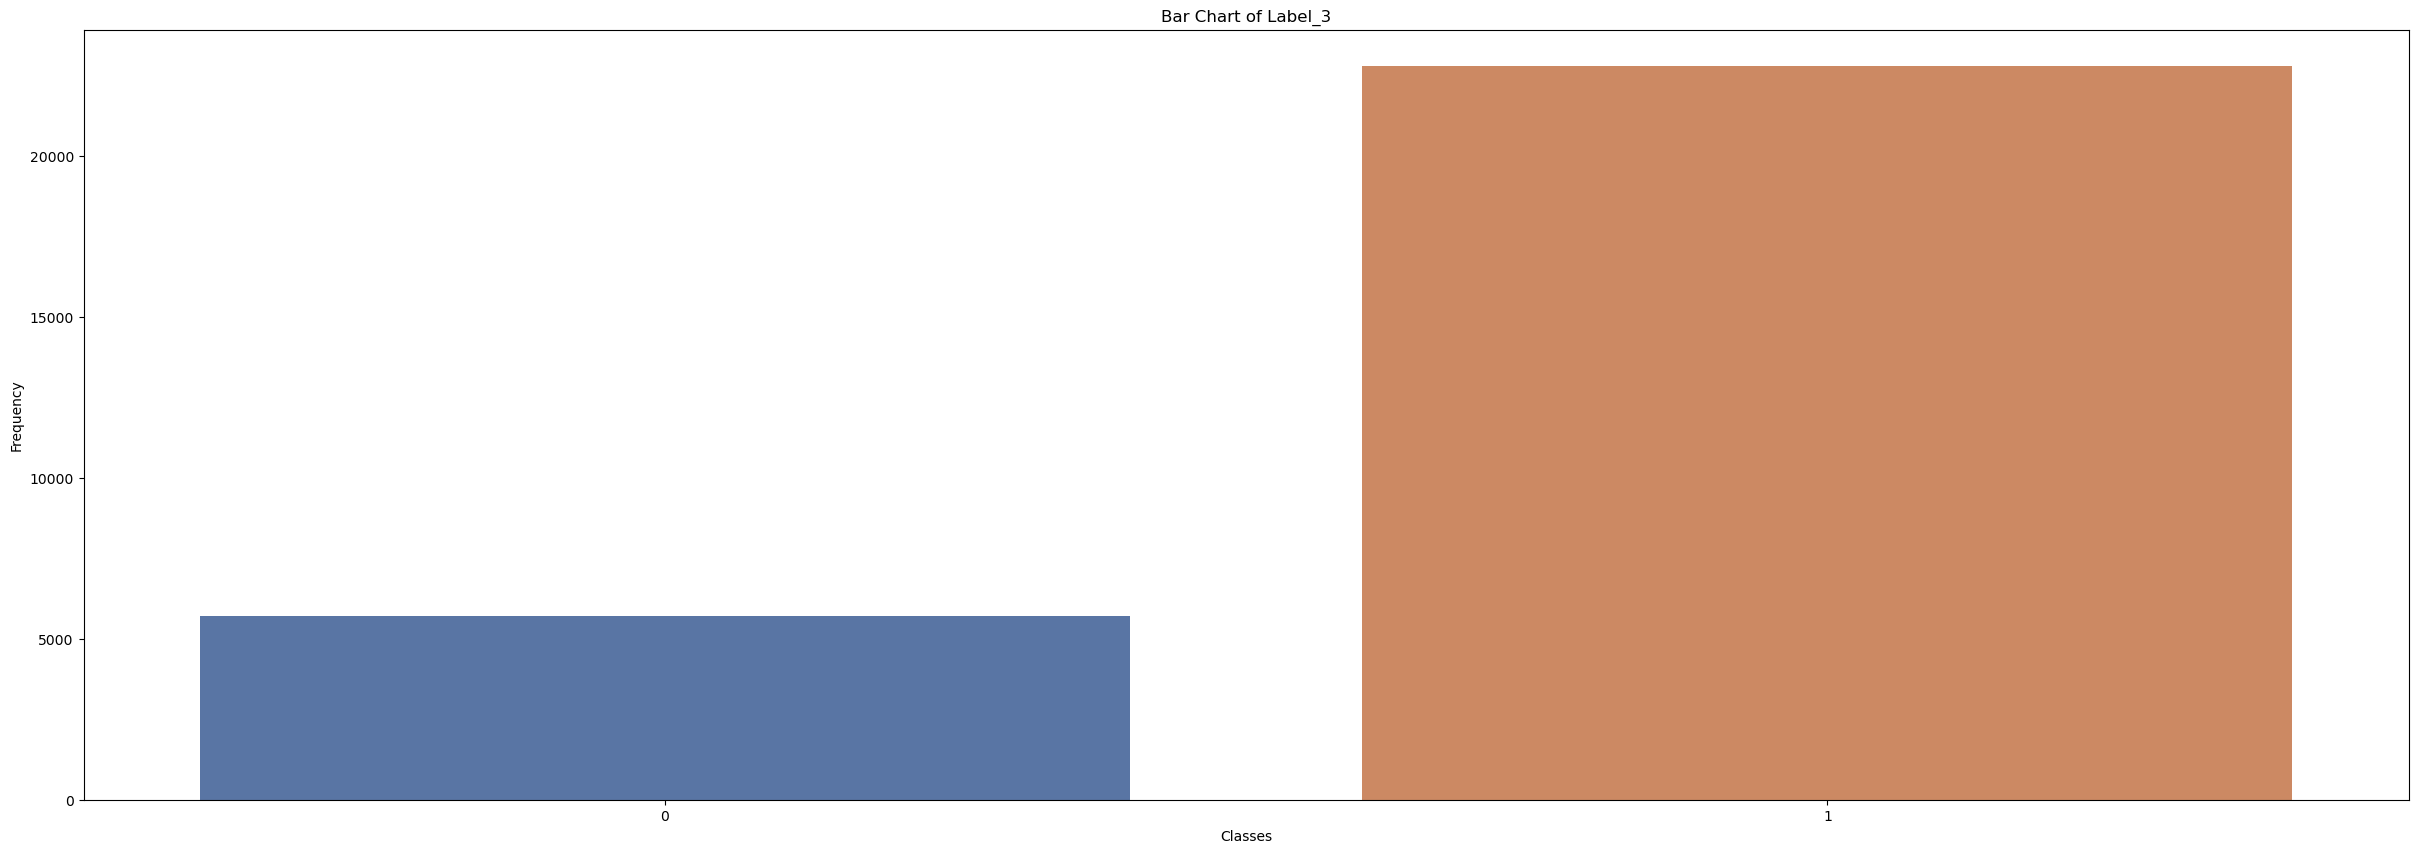

In [19]:
create_barchart(training_target_label_3,'Bar Chart of Label_3','Classes','Frequency')

- Class Distribution is Unbalanced

#### 4.Label_4 

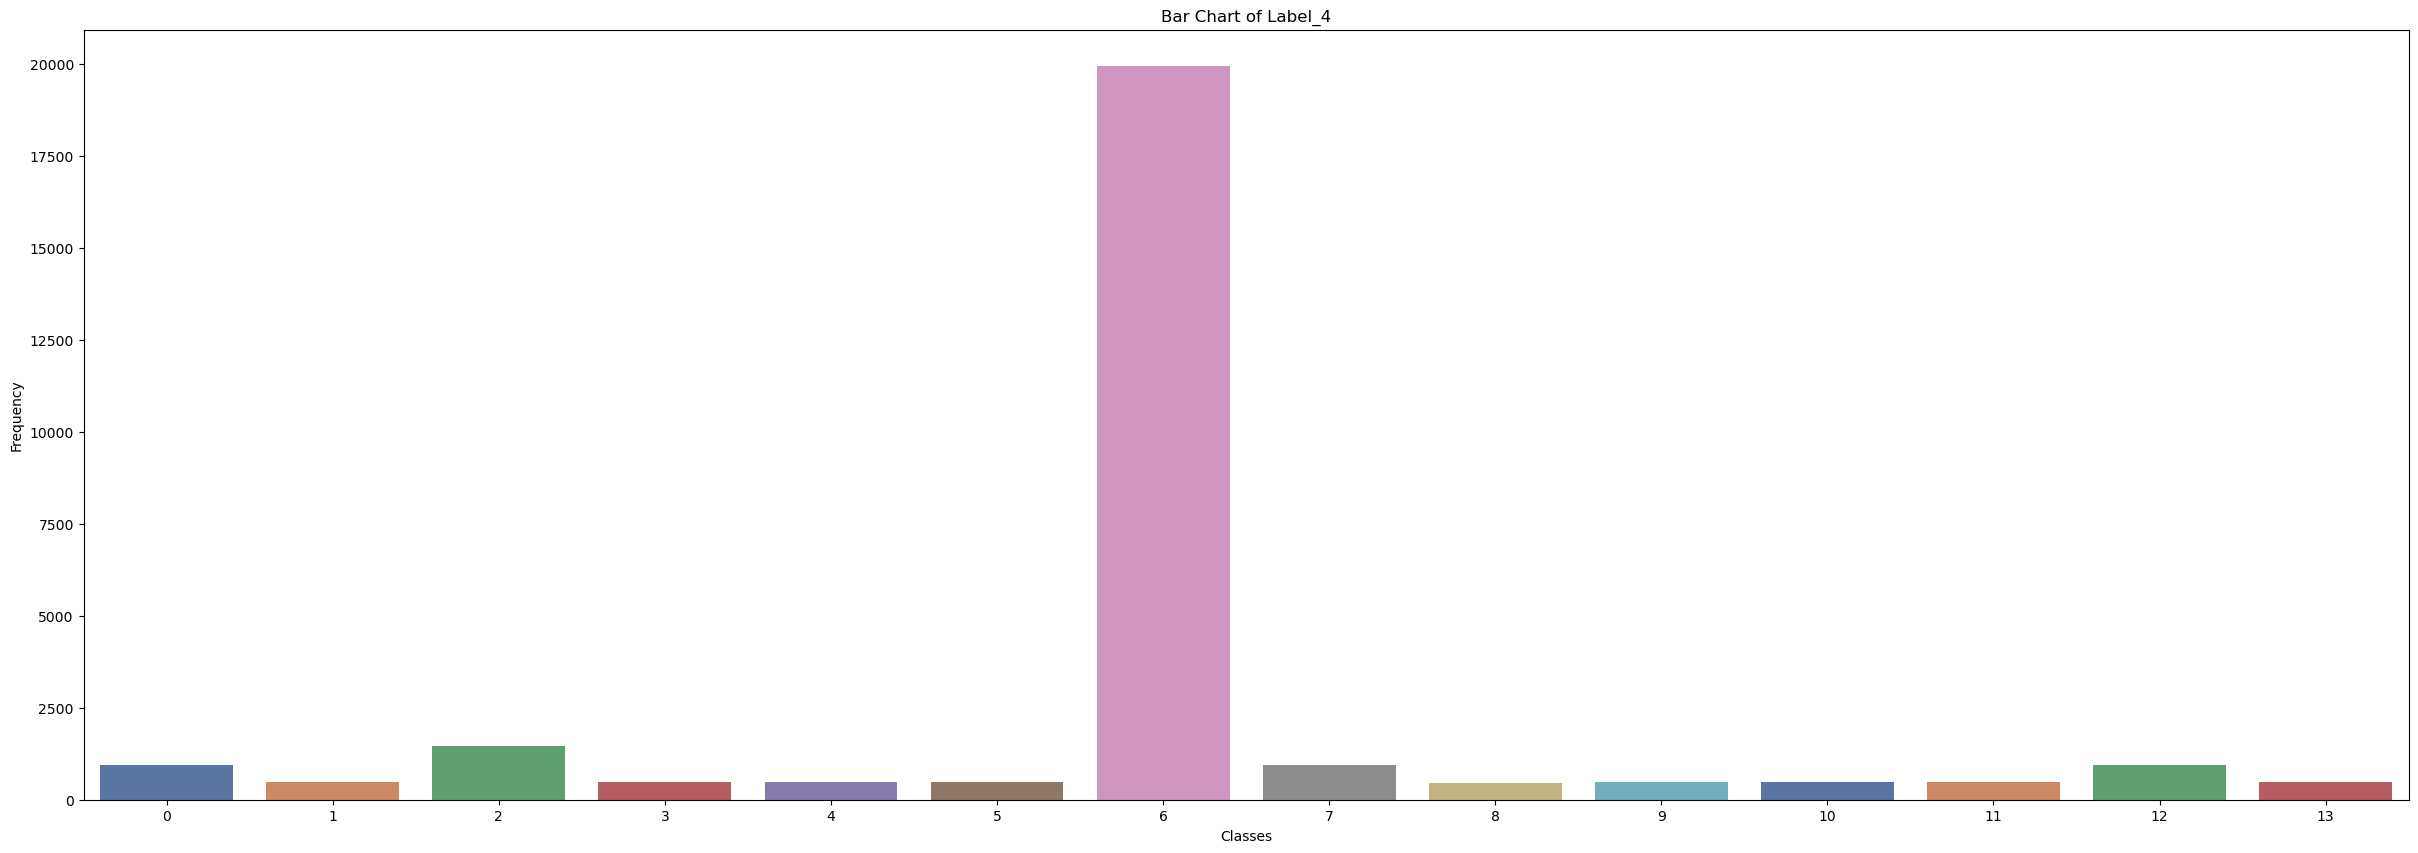

In [20]:
create_barchart(training_target_label_4,'Bar Chart of Label_4','Classes','Frequency')

- Class Distribution is Unbalanced

## Feature Engineering

### Robust Scaling & Dimensionality Reduction using PCA For Label 1,3,4

In [26]:
# Define the preprocessing steps
scaler = RobustScaler()
pca = PCA(n_components=0.85, svd_solver='full')

# Create a pipeline
feature_engineering_pipeline = Pipeline([
    ('scaler', scaler),      # Step 1: Scaling
    ('pca', pca)            # Step 2: PCA
])

In [27]:
# Fit and transform the training data
pca_components_training = feature_engineering_pipeline.fit_transform(training_features)

In [28]:
# Transform the validation data using the same pipeline
pca_components_validation = feature_engineering_pipeline.transform(validation_features)

In [29]:
# Transform the Test data using the same pipeline
pca_components_testing = feature_engineering_pipeline.transform(test_features)

In [30]:
pca_components_training.shape

(28520, 119)

In [31]:
pca_components_validation.shape

(750, 119)

In [32]:
pca_components_testing.shape

(744, 119)

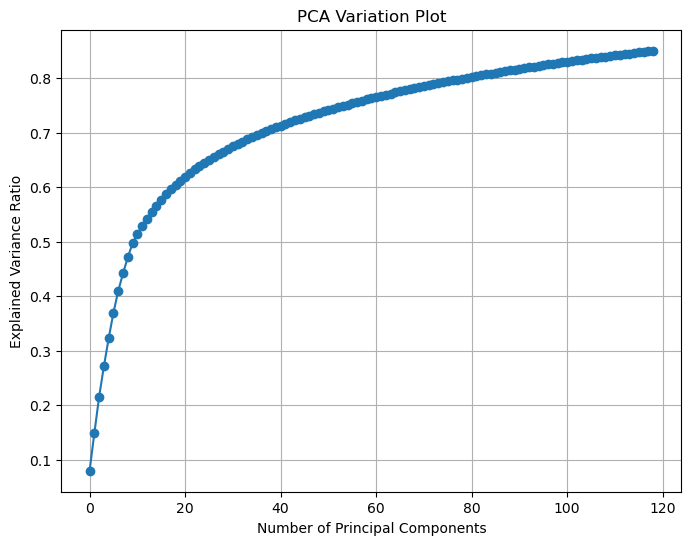

In [33]:
# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a variation plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Variation Plot')
plt.grid(True)
plt.show()

### Robust Scaling & Dimensionality Reduction using PCA For Label 2

In [34]:
# Define the preprocessing steps
scaler_for_label_2 = RobustScaler()
pca_for_label_2 = PCA(n_components=0.85, svd_solver='full')

# Create a pipeline
feature_engineering_pipeline_for_label_2 = Pipeline([
    ('scaler', scaler_for_label_2),      # Step 1: Scaling
    ('pca', pca_for_label_2)            # Step 2: PCA
])

In [35]:
# Fit and transform the training data
pca_components_training_for_label_2 = feature_engineering_pipeline_for_label_2.fit_transform(training_features_label_2)

In [36]:
# Transform the validation data using the same pipeline
pca_components_validation_for_label_2 = feature_engineering_pipeline_for_label_2.transform(validation_features_label_2)

In [37]:
# Transform the Test data using the same pipeline
pca_components_testing_label_2 = feature_engineering_pipeline_for_label_2.transform(test_features)

In [38]:
pca_components_training_for_label_2.shape

(28040, 118)

In [39]:
pca_components_validation_for_label_2.shape

(736, 118)

In [40]:
pca_components_testing_label_2.shape

(744, 118)

## HyperParameter Tuning with cross-validation  

In [41]:
def evaluate_model(x_test, y_test, models, average='macro'):
    for model_name, model in models:
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=average)
        recall = recall_score(y_test, y_pred, average=average)
        f1_score_value = f1_score(y_test, y_pred, average=average)
        print(model_name)
        print(f"Validation Accuracy : {accuracy:.4f}")
        print(f"Validation Precision : {precision:.4f}")
        print(f"Validation Recall : {recall:.4f}")
        print(f"Validation f1 score : {f1_score_value:.4f}")

In [42]:
def grid_search_with_cv(model, param_grid, x_train, y_train, cv_splits=5, test_size=0.4, random_state=42,
                        scoring='accuracy', n_jobs=1):
    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=StratifiedShuffleSplit(n_splits=cv_splits, test_size=test_size, random_state=random_state),
        scoring=scoring,
        verbose=2,
        n_jobs=n_jobs
    )

    # Fit the grid search to the training data
    grid_search.fit(x_train, y_train)

    # Get the best hyperparameters,best score value and the best model
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    return best_params, best_score, best_model

In [43]:
def save_model(model, filename):
    try:
        joblib.dump(model, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"Error saving the model: {str(e)}")

In [44]:

def load_model(filename):
    try:
        model = joblib.load(filename)
        print(f"Model loaded from {filename}")
        return model
    except Exception as e:
        print(f"Error loading the model: {str(e)}")
        return None

### 1.For Label_1

In [35]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}  # Hyper parameter values

In [36]:
# Create an SVC classifier
svm_classifier_for_label_1 = SVC()
 # Perform hyperparameter tuning with Stratified Shuffle Split cross validation
best_params_for_label_1, best_score_for_label_1, best_model_for_label_1 = grid_search_with_cv(model=svm_classifier_for_label_1,
                                        param_grid=param_grid,x_train=pca_components_training,y_train=training_target_label_1, n_jobs=6,test_size=0.4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [39]:
best_params_for_label_1

{'C': 100, 'gamma': 0.001}

In [38]:
best_score_for_label_1

0.9026998597475455

In [41]:
# save the best model
save_model(model=best_model_for_label_1, filename='./Models/model_label_1')

Model saved to ./Models/model_label_1


In [45]:
model_for_label_1 = load_model(filename='./Models/model_label_1')
# Define a list of models
models_for_label_1 = [('SVC', model_for_label_1)]
evaluate_model(x_test=pca_components_validation, y_test=validation_target_label_1, models=models_for_label_1)

Model loaded from ./Models/model_label_1
SVC
Validation Accuracy : 0.9253
Validation Precision : 0.9314
Validation Recall : 0.9284
Validation f1 score : 0.9266


### 2.For Label_2

In [63]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}  # Hyper parameter values

In [70]:
# Create an SVC classifier
svm_classifier_for_label_2 = SVC(class_weight='balanced')
 # Perform hyperparameter tuning with Stratified Shuffle Split cross validation
best_params_for_label_2, best_score_for_label_2, best_model_for_label_2 = grid_search_with_cv(model=svm_classifier_for_label_2, param_grid=param_grid,
                                                x_train=pca_components_training_for_label_2,y_train=training_target_label_2, n_jobs=6,test_size=0.4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [71]:
best_params_for_label_2

{'C': 100, 'gamma': 0.001}

In [72]:
best_score_for_label_2

0.8475035663338089

In [67]:
### save the best model
save_model(model=best_model_for_label_2, filename='./Models/model_label_2')

Model saved to ./Models/model_label_2


In [46]:
model_for_label_2 = load_model(filename='./Models/model_label_2')
# Define a list of models
models_for_label_2 = [('SVC', model_for_label_2)]
evaluate_model(x_test=pca_components_validation_for_label_2, y_test=validation_target_label_2, models=models_for_label_2, average='weighted')

Model loaded from ./Models/model_label_2
SVC
Validation Accuracy : 0.9117
Validation Precision : 0.9171
Validation Recall : 0.9117
Validation f1 score : 0.9120


### 3.For Label_3

In [45]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}  # Hyper parameter values

In [46]:
# Create an SVC classifier
svm_classifier_for_label_3 = SVC(class_weight='balanced')
 # Perform hyperparameter tuning with Stratified Shuffle Split cross validation
best_params_for_label_3, best_score_for_label_3, best_model_for_label_3 = grid_search_with_cv(model=svm_classifier_for_label_3, param_grid=param_grid,
                                        x_train=pca_components_training,y_train=training_target_label_3, n_jobs=6,test_size=0.4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [47]:
best_params_for_label_3

{'C': 100, 'gamma': 0.001}

In [48]:
best_score_for_label_3

0.9924088359046284

In [49]:
### save the best model
save_model(model=best_model_for_label_3, filename='./Models/model_label_3')

Model saved to ./Models/model_label_3


In [47]:
model_for_label_3 = load_model(filename='./Models/model_label_3')
# Define a list of models
models_for_label_3 = [('SVC', model_for_label_3)]
evaluate_model(x_test=pca_components_validation, y_test=validation_target_label_3, models=models_for_label_3,average='weighted')

Model loaded from ./Models/model_label_3
SVC
Validation Accuracy : 0.9960
Validation Precision : 0.9961
Validation Recall : 0.9960
Validation f1 score : 0.9960


### 4.For Label_4

In [78]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}  # Hyper parameter values

In [79]:
# Create an SVC classifier
svm_classifier_for_label_4 = SVC(class_weight='balanced')
 # Perform hyperparameter tuning with Stratified Shuffle Split cross validation
best_params_for_label_4, best_score_for_label_4, best_model_for_label_4 = grid_search_with_cv(model=svm_classifier_for_label_4, param_grid=param_grid,
                                        x_train=pca_components_training,y_train=training_target_label_4, n_jobs=6,test_size=0.3)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [80]:
best_params_for_label_4

{'C': 100, 'gamma': 0.001}

In [81]:
best_score_for_label_4

0.9280037400654513

In [82]:
### save the best model
save_model(model=best_model_for_label_4, filename='./Models/model_label_4')

Model saved to ./Models/model_label_4


In [48]:
model_for_label_4 = load_model(filename='./Models/model_label_4')
# Define a list of models
models_for_label_4 = [('SVC', model_for_label_4)]
evaluate_model(x_test=pca_components_validation, y_test=validation_target_label_4, models=models_for_label_4,average='weighted')

Model loaded from ./Models/model_label_4
SVC
Validation Accuracy : 0.9213
Validation Precision : 0.9302
Validation Recall : 0.9213
Validation f1 score : 0.9238


## Save Test Dataset Results

In [131]:
model_label_1 = load_model("./Models/model_label_1")
model_label_2 = load_model("./Models/model_label_2")
model_label_3 = load_model("./Models/model_label_3")
model_label_4 = load_model("./Models/model_label_4")

# get prediction results
label_1 = model_label_1.predict(pca_components_testing)
label_2 = model_label_2.predict(pca_components_testing_label_2)
label_3 = model_label_3.predict(pca_components_testing)
label_4 = model_label_4.predict(pca_components_testing)

result_df = pd.DataFrame({'ID': test_IDs, 'label_1': label_1, 'label_2': label_2.astype(int), 'label_3': label_3, 'label_4': label_4})
result_df.to_csv("Test.csv",index=False)

Model loaded from ./Models/model_label_1
Model loaded from ./Models/model_label_2
Model loaded from ./Models/model_label_3
Model loaded from ./Models/model_label_4
